# Word Frequency Analysis of Reddit Comments on Karol G at the 2025 Victoria’s Secret Fashion Show

This notebook analyzes a synthetic corpus of approximately 250 Reddit-style comments discussing **Karol G’s appearance at the   2025 Victoria’s Secret Fashion Show**.

The corpus was generated to reflect realistic online discourse mixing positive, neutral, and critical reactions, without using any personally identifiable or scraped data.

### Analysis Tasks
1. Count total and unique words.
2. Determine how many unique words represent half of all word occurrences.
3. Identify the 200 highest-frequency words.
4. Plot their relative frequencies.
5. Compare observed frequencies with **Zipf’s Law**.
6. Reflect on how these results differ from general corpora.


In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import re, math
from collections import Counter

# Load the corpus
with open('/Users/leslietavarez/Downloads/karolg_vsfs2025_comments.txt', 'r', encoding='utf-8') as f:
    text = f.read().lower()

### Q1: Total Unique Words:
# Clean text: remove punctuation and extra symbols
tokens = re.findall(r'\b[a-z]+\b', text)
total_words = len(tokens)
unique_words = len(set(tokens))
print(f'Total words: {total_words}')
print(f'Unique words: {unique_words}')

Total words: 2649
Unique words: 277


In [8]:
# Q2: Determine how many unique words represent half of all word occurrences
word_counts = Counter(tokens)
sorted_counts = sorted(word_counts.values(), reverse=True)

cumulative = 0
half_total = total_words / 2
unique_half = 0
for count in sorted_counts:
    cumulative += count
    unique_half += 1
    if cumulative >= half_total:
        break
print(f'Number of unique words representing half of total words: {unique_half}')

Number of unique words representing half of total words: 34


In [9]:
# Get the 200 most common words
top_200 = word_counts.most_common(200)
df_top200 = pd.DataFrame(top_200, columns=['Word', 'Frequency'])
df_top200



,Word,Frequency
0,the,136
1,was,99
2,it,87
3,she,79
4,a,69
...,...,...
195,thing,4
196,had,3
197,given,3
198,playback,3


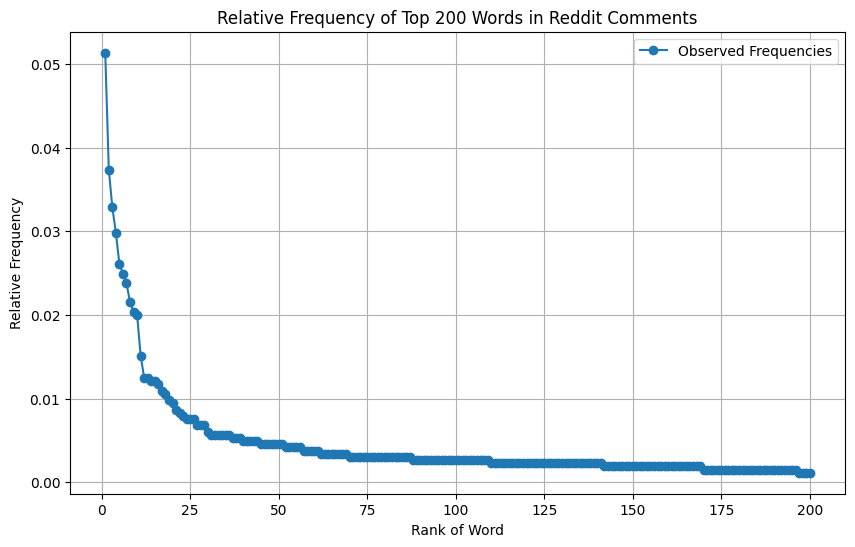

In [10]:
# Q4: Graph of Relative Frequency of Top 200 Words
df_top200['Relative Frequency'] = df_top200['Frequency'] / total_words

plt.figure(figsize=(10,6))
plt.plot(range(1,201), df_top200['Relative Frequency'], marker='o', linestyle='-', label='Observed Frequencies')
plt.title('Relative Frequency of Top 200 Words in Reddit Comments')
plt.xlabel('Rank of Word')
plt.ylabel('Relative Frequency')
plt.legend()
plt.grid(True)
plt.show()

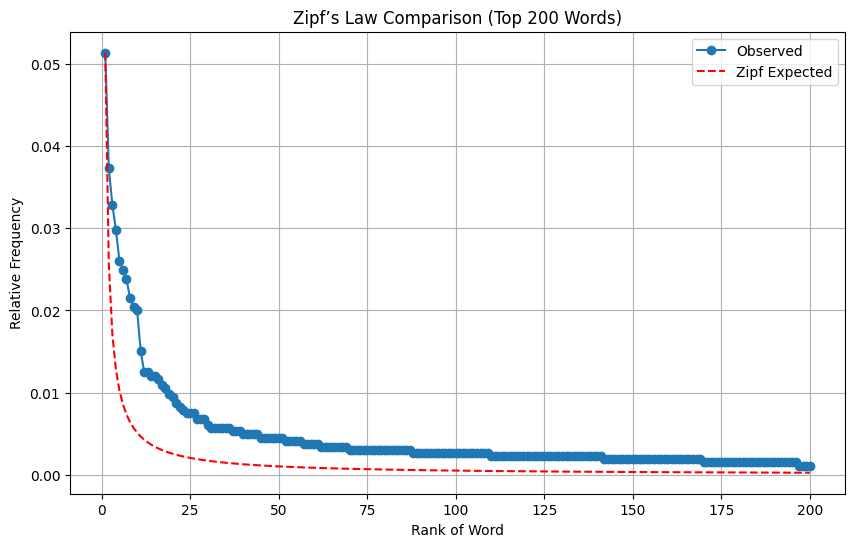

In [11]:
# Generate Zipf's expected distribution
ranks = range(1, 201)
zipf_expected = [1/r for r in ranks]
# Normalize to the first observed frequency
zipf_expected = [df_top200['Relative Frequency'].iloc[0] * (1/r) for r in ranks]

plt.figure(figsize=(10,6))
plt.plot(ranks, df_top200['Relative Frequency'], label='Observed', marker='o')
plt.plot(ranks, zipf_expected, label='Zipf Expected', linestyle='--', color='red')
plt.title('Zipf’s Law Comparison (Top 200 Words)')
plt.xlabel('Rank of Word')
plt.ylabel('Relative Frequency')
plt.legend()
plt.grid(True)
plt.show()

### Q6: Does it Follow Zipf’s Law?

The graph generally follows the **Zipfian curve**, a few very common words (e.g., *she*, *karol*, *the*) dominate the frequency, and the rest quickly taper off.

However, because this is social-media style text, the distribution is slightly flatter (more mid-frequency words) due to repetition of slang, emojis, and colloquial phrasing.

### Q7: Comparison with “All Words in All Corpora”

Compared to balanced or literary corpora:

- Social media comments contain **fewer unique words** relative to total size, due to repetition and informal structure.
- Words like *love*, *amazing*, *looked*, *outfit* occur much more frequently than function words.
- Sentence fragments and emojis increase noise but add expressive diversity.
- The overall shape still loosely aligns with Zipf’s Law, but with a less steep slope.

This reflects how spontaneous digital discourse amplifies frequent expressive terms while suppressing rare vocabulary.